In [157]:
from random import randint
from math import exp
import numpy as np
import networkx as nx

# Задачи

1. Переписать под 3 подаваемых значения, а не под список

In [158]:
learning_rate = 3
epoch = 100

imput_values = np.array([1, 1, 1], dtype=float)
out_expected_values = 0


neuron_hidden_layer_1 = np.array([0,0,0], dtype=float)
neuron_hidden_layer_2 = np.array([0,0], dtype=float)
out_actual_values = np.array([0], dtype=float)

# ошибка на нейроне от двух нейронов на втором слое к трем на первом слое [2][3]
neuron_hidden_layer_error_1 = np.array([
    [0,0,0],
    [0,0,0]
    ], dtype=float)

# ошибка на нейроне от поckеднего нейрона к двум на втором слое [1][2]
neuron_hidden_layer_error_2 = np.array([0,0])

# веса к трем от трех [3][3]
weights_1 = np.array([
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000]
    ], dtype=float)

# веса к двум от трех [2][3]
weights_2 = np.array([
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000]
    ], dtype=float)

# веса к одному от двух [1][2]
weights_3 = np.array([randint(0,1000)/1000, randint(0,1000)/1000], dtype=float)

In [159]:
weights_1

array([[0.09 , 0.096, 0.349],
       [0.837, 0.111, 0.085],
       [0.114, 0.609, 0.439]])

In [160]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [161]:
def activation_value(imput_values, weights, output_walues):

    for i_neuron in imput_values:
        for i in range(len(output_walues)):
            output_walues[i] = sigmoid(np.sum(i_neuron * weights[i]))

    return output_walues

In [162]:
def running(
    imput_values, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
    weights_1, weights_2, weights_3):
    
    neuron_hidden_layer_1 = activation_value(imput_values, weights_1, neuron_hidden_layer_1)
    neuron_hidden_layer_2 = activation_value(neuron_hidden_layer_1, weights_2, neuron_hidden_layer_2)
    out_actual_values = activation_value(neuron_hidden_layer_2, weights_3, out_actual_values)

    return neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values

In [163]:
neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(
    imput_values, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
    weights_1, weights_2, weights_3)

In [164]:
print('_'*len(str(imput_values)))
print(imput_values)
print('^'*len(str(imput_values)))

print(weights_1)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(neuron_hidden_layer_1)))
print(neuron_hidden_layer_1)
print('^'*len(str(neuron_hidden_layer_1)))

print(weights_2)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(neuron_hidden_layer_2)))
print(neuron_hidden_layer_2)
print('^'*len(str(neuron_hidden_layer_2)))

print(weights_3)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(out_actual_values)))
print(out_actual_values)
print('^'*len(str(out_actual_values)))

__________
[1. 1. 1.]
^^^^^^^^^^
[[0.09  0.096 0.349]
 [0.837 0.111 0.085]
 [0.114 0.609 0.439]]

   | 
   ▼ 
__________________________________
[0.63064853 0.73749709 0.76169594]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[[0.521 0.698 0.846]
 [0.578 0.653 0.176]]

   | 
   ▼ 
_______________________
[0.82819693 0.74492125]
^^^^^^^^^^^^^^^^^^^^^^^
[0.391 0.25 ]

   | 
   ▼ 
___________
[0.5723056]
^^^^^^^^^^^


{('In_0', 'H_1.0'): Text(0.6, 0.0, '0.09'),
 ('In_1', 'H_1.0'): Text(0.6, -0.4, '0.096'),
 ('In_2', 'H_1.0'): Text(0.6, -0.8, '0.349'),
 ('In_0', 'H_1.1'): Text(0.6, -0.6, '0.837'),
 ('In_1', 'H_1.1'): Text(0.6, -1.0, '0.111'),
 ('In_2', 'H_1.1'): Text(0.6, -1.4, '0.085'),
 ('In_0', 'H_1.2'): Text(0.6, -1.2, '0.114'),
 ('In_1', 'H_1.2'): Text(0.6, -1.6, '0.609'),
 ('In_2', 'H_1.2'): Text(0.6, -2.0, '0.439'),
 ('H_1.0', 'H_2.0'): Text(1.6, -0.3, '0.521'),
 ('H_1.1', 'H_2.0'): Text(1.6, -0.7, '0.698'),
 ('H_1.2', 'H_2.0'): Text(1.6, -1.1, '0.846'),
 ('H_1.0', 'H_2.1'): Text(1.6, -0.8999999999999999, '0.578'),
 ('H_1.1', 'H_2.1'): Text(1.6, -1.2999999999999998, '0.653'),
 ('H_1.2', 'H_2.1'): Text(1.6, -1.7, '0.176'),
 ('H_2.0', 'Out_0'): Text(2.5999999999999996, -0.8, '0.391'),
 ('H_2.1', 'Out_0'): Text(2.5999999999999996, -1.2000000000000002, '0.25')}

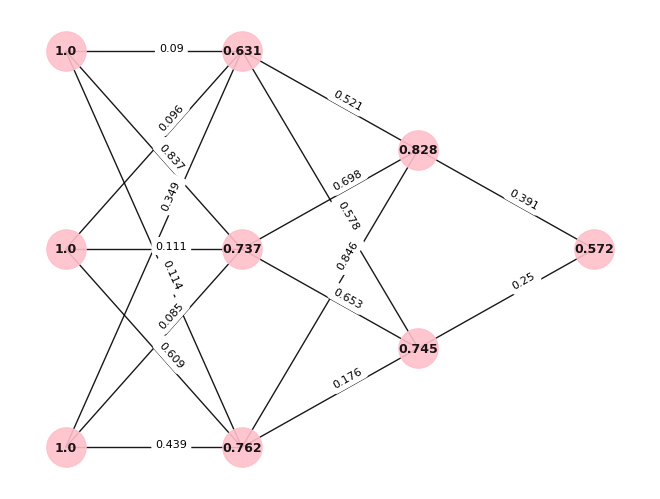

In [168]:
nodes = []
positions = {}
nodes_labels = {}
for i in range(len(imput_values)):
    node = 'In_'+str(i)
    nodes.append(node)
    positions[node] = [0, -i]
    nodes_labels[node]= round(imput_values[i],3)
for i in range(len(neuron_hidden_layer_1)):
    node = 'H_1.'+str(i)
    nodes.append(node)
    positions[node] = [1, -i]
    nodes_labels[node]= round(neuron_hidden_layer_1[i],3)
for i in range(len(neuron_hidden_layer_2)):
    node = 'H_2.'+str(i)
    nodes.append(node)
    positions[node] = [2, -i-0.5]
    nodes_labels[node]= round(neuron_hidden_layer_2[i],3)
for i in range(len(out_actual_values)):
    node = 'Out_'+str(i)
    nodes.append(node)
    positions[node] = [3, -1]
    nodes_labels[node]= round(out_actual_values[i],3)

edges = []
edges_labels = {}
for i in range(len(neuron_hidden_layer_1)):
    for j in range(len(imput_values)):
        edge_value = ('In_'+str(j), 'H_1.'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_1[i][j]
for i in range(len(neuron_hidden_layer_2)):
    for j in range(len(neuron_hidden_layer_1)):
        edge_value = ('H_1.'+str(j), 'H_2.'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_2[i][j]
for i in range(len(out_actual_values)):
    for j in range(len(neuron_hidden_layer_2)):
        edge_value = ('H_2.'+str(j), 'Out_'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_3[j]

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(
    G, pos=positions, edge_color='black', linewidths=1,
    node_size=800, node_color='pink', alpha=0.9,
    labels=nodes_labels, font_size=9, font_weight = 'bold'
)

nx.draw_networkx_edge_labels(
    G, pos=positions,
    edge_labels=edges_labels,
    verticalalignment='baseline',
    label_pos=0.4, font_size=8)

In [114]:
def backpropagation_error(
    out_actual_values, out_expected_values,
    neuron_hidden_layer_2, neuron_hidden_layer_1, imput_values,
    weights_3, weights_2, weights_1,
    neuron_hidden_layer_error_2, neuron_hidden_layer_error_1,
    learning_rate = 0.3
    ):
    '''
    Функция обратного распределения ошибки
    '''
    
    
    
    return weights_1, weights_2, weights_2

In [107]:
def calculation_first_error(actual, expected):
    return actual - expected

def calculation_error(weight, delta):
    return weight * delta

In [108]:
def calculation_delta(value, error):
    weights_delta = error * sigmoid(value) * (1-sigmoid(value))
    return weights_delta

In [109]:
def correct_weight(weight, value, delta, learning_rate):
    return weight - value * delta * learning_rate

In [110]:
def backpropagation_error(
    neuron_hidden_layer_1,
    neuron_hidden_layer_2,
    out_actual_values,
    out_expected_values,
    weights_1,
    weights_2,
    weights_3,
    learning_rate,
    neuron_hidden_layer_error_1,
    neuron_hidden_layer_error_2,
    imput_values):

    


    for i in range(len(out_actual_values)):
        first_error = calculation_first_error(out_actual_values[i], out_expected_values[i])
        for j in range(len(neuron_hidden_layer_2[0])):
            
            delta = calculation_delta(neuron_hidden_layer_2[i][j], first_error)
            weights_3[j] = correct_weight(weights_3[j], neuron_hidden_layer_2[i][j], delta, learning_rate)

            neuron_hidden_layer_error_2[i][j] = calculation_error(weights_3[j], delta)
    

    for i in range(len(neuron_hidden_layer_2)):
        for j in range(len(neuron_hidden_layer_1[0])):
            for k in range(len(neuron_hidden_layer_error_2[0])):
                for l in range(len(weights_2)):
                    
                    delta = calculation_delta(neuron_hidden_layer_1[i][j], neuron_hidden_layer_error_2[i][l])
                    weights_2[k][l] = correct_weight(weights_2[k][l], neuron_hidden_layer_1[i][j], delta, learning_rate)

                    neuron_hidden_layer_error_1[i][j][k] = calculation_error(weights_2[k][l], delta)


    for i in range(len(neuron_hidden_layer_1)):
        for j in range(len(imput_values[0])):
            for k in range(len(neuron_hidden_layer_error_1[0][0])):

                delta = calculation_delta(imput_values[i][j], neuron_hidden_layer_error_1[i][j][k])

                for l in range(len(weights_1[0])):
                
                    weights_1[j][l] = correct_weight(weights_1[j][l], neuron_hidden_layer_1[i][j], delta, learning_rate)
    
    return weights_1, weights_2, weights_2

In [111]:
def train(
    epoch,
    neuron_hidden_layer_1,
    neuron_hidden_layer_2,
    out_actual_values,
    out_expected_values,
    weights_1,
    weights_2,
    weights_3,
    learning_rate,
    neuron_hidden_layer_error_1,
    neuron_hidden_layer_error_2,
    imput_values):
    
    for i in range(epoch):
        neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(imput_values, weights_1, weights_2, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values)
        print(out_actual_values)
        weights_1, weights_2, weights_2 = backpropagation_error(
            neuron_hidden_layer_1,
            neuron_hidden_layer_2,
            out_actual_values,
            out_expected_values,
            weights_1,
            weights_2,
            weights_3,
            learning_rate,
            neuron_hidden_layer_error_1,
            neuron_hidden_layer_error_2,
            imput_values)